### Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using beautifulsoup and load to a pandas dataframe.

In [73]:
import urllib.request
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pendulum

In [74]:
#http request
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
#result of that request
result = urllib.request.urlopen(request)
#reand and store the result
resulttext = result.read()

In [75]:
#We use the BS constructor to pull data from HTML or XML document
soup = BS(resulttext, 'html.parser')
#The first argument is what we want to make soup from.
#The second argument tells beautifulsoup how we want to handle what was passed in as the first argument

In [76]:
#print(soup.prettify())

In [77]:
quake_table = soup.find('table', 'sortable wikitable')
type(quake_table)

bs4.element.Tag

In [78]:
#print(quake_table.prettify())

In [79]:
data_for_df = []

In [80]:
table_for_looping = quake_table.findAll('tr')
type(table_for_looping)

bs4.element.ResultSet

In [81]:
for row in table_for_looping:
    cells = row.find_all('td')
    cells = [cell.text.strip() for cell in cells]
    data_for_df.append(cells)

In [82]:
quake_df = pd.DataFrame(data_for_df)
quake_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,None,None,None,None,None,None,None,None,None,None,None,None
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,


In [83]:
quake_df.columns = ['origin','country','lat','long','depth','mag','sec_effects','shaking_death','pde_total','utsu_total','emdat_total','other']

In [84]:
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
0,None,None,None,None,None,None,None,None,None,None,None,None
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,


In [85]:
# some basic data exploration
quake_df.shape

(1341, 12)

In [86]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 12 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1340 non-null object
long             1340 non-null object
depth            1340 non-null object
mag              1340 non-null object
sec_effects      1340 non-null object
shaking_death    1340 non-null object
pde_total        1340 non-null object
utsu_total       1340 non-null object
emdat_total      1340 non-null object
other            1338 non-null object
dtypes: object(12)
memory usage: 125.8+ KB


In [87]:
quake_df.drop(0, inplace=True)

In [88]:
quake_df.head(10)

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
5,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
10,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [89]:
quake_df['shaking_death'] = quake_df['shaking_death'].fillna(value = np.nan)

In [90]:
quake_df.head(10)

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
5,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
10,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [91]:
quake_df = quake_df.apply(lambda x: x.str.strip()).replace('', np.nan)

In [92]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 12 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1326 non-null object
long             1326 non-null object
depth            1250 non-null object
mag              1339 non-null object
sec_effects      373 non-null object
shaking_death    739 non-null object
pde_total        750 non-null object
utsu_total       1027 non-null object
emdat_total      560 non-null object
other            37 non-null object
dtypes: object(12)
memory usage: 136.1+ KB


In [93]:
quake_df.head(10)

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [94]:
quake_df['country'] = quake_df.country.str.replace(r'\(.*','')

In [95]:
quake_df.country.value_counts(dropna=False)

China                                133
Indonesia                             82
Iran                                  78
Japan                                 62
Turkey                                60
Peru                                  48
Greece                                38
Mexico                                37
Turkey                                35
Philippines                           35
China                                 33
Taiwan                                32
Chile                                 31
Italy                                 26
Afghanistan                           25
Colombia                              21
Japan                                 20
Pakistan                              20
Algeria                               19
United States                         18
United States                         16
India                                 16
Taiwan                                16
Papua New Guinea                      15
Ecuador         

In [96]:
quake_df.other.value_counts(dropna = False)

NaN                                    1303
1                                         3
8000+                                     1
2,698                                     1
41                                        1
105000                                    1
150+                                      1
601 (as of October 30, 2011)              1
33[8]                                     1
45000[9]                                  1
120                                       1
2041                                      1
60[16]                                    1
15894[20]                                 1
231000*[13] 283000*[14] 227898*[15]       1
46                                        1
26271[11] 26000[12]                       1
2489[10]                                  1
181                                       1
1,115                                     1
34                                        1
42                                        1
295                             

In [97]:
quake_df['other'] = quake_df.other.str.replace(r'+','')
quake_df['other'] = quake_df.other.str.replace(r',','')
quake_df['other'] = quake_df.other.str.extract('(\d+)', expand = True)

In [98]:
quake_df.other.value_counts(dropna = False)

NaN       1303
1            3
68           1
8000         1
1404         1
26271        1
189          1
120          1
15894        1
521          1
41           1
33           1
105000       1
150          1
2041         1
46           1
2489         1
3500         1
181          1
42           1
601          1
295          1
380          1
111          1
1500         1
1115         1
60           1
164          1
79           1
231000       1
45000        1
222517       1
215          1
2698         1
34           1
200          1
Name: other, dtype: int64

In [99]:
quake_df.mag.value_counts(dropna = False)

7.2 Mw         46
6.5 Mw         38
5.6 Mw         38
7.1 Mw         37
5.8 Mw         34
6.8 Muk        34
5.9 Mw         32
6.3 Mw         32
6.4 Mw         32
6.2 Mw         31
6.1 Mw         31
7.5 Mw         31
5.5 Mw         29
6.0 Mw         28
6.6 Mw         27
5.4 Mw         26
6.9 Mw         25
7.3 Mw         25
7.7 Mw         25
6.0 Muk        24
7.6 Mw         24
5.7 Mw         23
5.3 Mw         23
7.0 Mw         22
6.8 Ms         22
6.7 Mw         21
6.8 Mw         19
7.8 Mw         17
5.2 Mw         17
7.4 Mw         17
               ..
9.5 Muk         1
2.2 ML          1
5.4 Muk         1
8.8 Mw [18]     1
4.6 ML          1
2.0 ML          1
7.6 Muk         1
7.0 MJMA        1
8.6 Ms          1
5.1 Lg          1
3.8 Md          1
8.2 Muk         1
5.0 ML          1
7.4 Muk         1
7.1 Muk         1
7.7 Muk         1
7.2 MJMA        1
8.4 Mw          1
8.3 Muk         1
8.4 Muk         1
6.0 Ms          1
4.5 Md          1
5.7 Ms          1
8.6 Mw          1
7.5 Ms    

In [100]:
quake_df['mag'] = quake_df.mag.str.extract('(\d\.\d)', expand = True)

In [101]:
quake_df.mag.value_counts(dropna = False)

6.8    76
6.9    60
6.5    58
7.2    57
6.0    56
5.6    56
5.8    50
6.3    50
7.1    49
6.2    48
5.5    48
5.9    47
6.4    46
7.0    43
6.6    40
7.5    39
6.1    39
6.7    38
5.7    38
7.3    36
5.4    32
7.6    30
7.7    28
5.3    27
5.2    25
7.4    23
7.8    19
4.9    18
7.9    18
5.0    17
       ..
4.8    10
8.0    10
4.7     7
8.2     7
4.6     6
4.5     6
4.2     6
4.3     6
8.3     6
4.4     3
8.6     3
2.7     3
3.8     3
9.0     2
NaN     2
3.4     2
8.4     2
8.8     2
8.5     2
2.8     2
3.5     1
2.6     1
4.0     1
8.7     1
2.2     1
9.5     1
9.2     1
9.1     1
2.0     1
2.3     1
Name: mag, Length: 62, dtype: int64

In [102]:
quake_df.mag = quake_df['mag'].apply(float)

In [103]:
quake_df.emdat_total.value_counts(dropna=False)

NaN       780
1          61
2          44
3          29
4          18
5          17
0          17
9          15
10         12
8          11
6          10
7           8
20          8
11          8
15          8
14          7
10000       7
30          6
100         6
13          6
24          5
29          5
22          5
6000        4
2500        4
19          4
2000        4
50          4
26          4
12          4
         ... 
143000      1
268         1
4700        1
9748        1
1400        1
271         1
32962       1
102         1
315         1
131         1
5131        1
455         1
1250        1
1186        1
176         1
200000      1
75000       1
69          1
35          1
2412        1
227         1
62          1
1961        1
63          1
709         1
94          1
1641        1
844         1
20005       1
37          1
Name: emdat_total, Length: 203, dtype: int64

In [104]:
quake_df['emdat_total'] = quake_df.emdat_total.str.extract('(\d+)', expand = True)

In [105]:
quake_df.emdat_total.value_counts(dropna=False)

NaN       780
1          61
2          44
3          29
4          18
5          17
0          17
9          15
10         13
8          11
6          10
11          8
7           8
20          8
15          8
14          7
10000       7
100         6
30          6
13          6
22          5
29          5
24          5
6000        4
50          4
12          4
19          4
26          4
2000        4
2500        4
         ... 
26796       1
143000      1
268         1
4700        1
9748        1
1400        1
271         1
32962       1
102         1
315         1
275         1
131         1
227         1
1186        1
176         1
200000      1
75000       1
69          1
35          1
2412        1
62          1
455         1
1961        1
63          1
709         1
94          1
1641        1
844         1
20005       1
5057        1
Name: emdat_total, Length: 202, dtype: int64

In [106]:
quake_df['other'] = quake_df['other'].astype(float)
quake_df['pde_total'] = quake_df['pde_total'].astype(float)
quake_df['utsu_total'] = quake_df['utsu_total'].astype(float)
quake_df['emdat_total'] = quake_df['emdat_total'].astype(float)

In [107]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 12 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1326 non-null object
long             1326 non-null object
depth            1250 non-null object
mag              1338 non-null float64
sec_effects      373 non-null object
shaking_death    739 non-null object
pde_total        750 non-null float64
utsu_total       1027 non-null float64
emdat_total      560 non-null float64
other            37 non-null float64
dtypes: float64(5), object(7)
memory usage: 136.1+ KB


In [108]:
quake_df.pde_total.value_counts(dropna=False)

NaN          590
 1.0         192
 2.0          96
 3.0          52
 4.0          33
 0.0          29
 5.0          28
 6.0          18
 11.0         15
 8.0          13
 15.0         12
 9.0          11
 7.0          10
 10.0         10
 12.0          7
 14.0          5
 24.0          5
 16.0          5
 20.0          5
 26.0          5
 18.0          5
 5000.0        4
 70.0          4
 60.0          4
 29.0          4
 30.0          4
 100.0         4
 25.0          4
 13.0          4
 1000.0        3
            ... 
 143.0         1
 137.0         1
 243.0         1
 450.0         1
 277.0         1
 107.0         1
 900.0         1
 655237.0      1
 2519.0        1
 297200.0      1
 87351.0       1
 795.0         1
 2683.0        1
 5749.0        1
 23000.0       1
 514.0         1
 1989.0        1
 70000.0       1
 1342.0        1
 1086.0        1
 133.0         1
 315.0         1
 65.0          1
 83.0          1
 159.0         1
 348.0         1
 852.0         1
 584.0        

In [109]:
quake_df.utsu_total.value_counts(dropna=False)

NaN         313
 1.0        171
 2.0        100
 3.0         49
 5.0         39
 4.0         38
 8.0         23
 7.0         23
 6.0         21
 11.0        19
 10.0        18
 9.0         18
 15.0        16
 12.0        11
 30.0        10
 17.0         9
 20.0         9
 18.0         9
 1000.0       7
 200.0        7
 500.0        7
 13.0         7
 100.0        7
 26.0         7
 22.0         6
 23.0         6
 16.0         6
 29.0         5
 50.0         5
 28.0         5
           ... 
 1086.0       1
 965.0        1
 119.0        1
 65.0         1
 1328.0       1
 71.0         1
 420.0        1
 111.0        1
 680.0        1
 91.0         1
 93.0         1
 159.0        1
 107.0        1
 177.0        1
 222.0        1
 428.0        1
 129.0        1
 130.0        1
 69.0         1
 155.0        1
 150.0        1
 290.0        1
 275.0        1
 3760.0       1
 565.0        1
 1879.0       1
 17118.0      1
 25000.0      1
 2700.0       1
 143.0        1
Name: utsu_total, Length

In [110]:
quake_df.emdat_total.value_counts(dropna=False)

NaN          780
 1.0          61
 2.0          44
 3.0          29
 4.0          18
 0.0          17
 5.0          17
 9.0          15
 10.0         13
 8.0          11
 6.0          10
 20.0          8
 11.0          8
 15.0          8
 7.0           8
 10000.0       7
 14.0          7
 100.0         6
 30.0          6
 13.0          6
 29.0          5
 22.0          5
 24.0          5
 2000.0        4
 12.0          4
 6000.0        4
 26.0          4
 2500.0        4
 50.0          4
 19.0          4
            ... 
 350.0         1
 233.0         1
 183.0         1
 271.0         1
 980.0         1
 191.0         1
 29980.0       1
 200000.0      1
 103.0         1
 4700.0        1
 95.0          1
 166.0         1
 81.0          1
 552.0         1
 32962.0       1
 125.0         1
 69.0          1
 300.0         1
 227.0         1
 121.0         1
 420.0         1
 171.0         1
 85.0          1
 179.0         1
 73.0          1
 4000.0        1
 213.0         1
 149.0        

In [111]:
quake_df.other.value_counts(dropna=False)

NaN          1303
 1.0            3
 60.0           1
 231000.0       1
 105000.0       1
 2489.0         1
 521.0          1
 42.0           1
 34.0           1
 41.0           1
 1404.0         1
 68.0           1
 33.0           1
 200.0          1
 120.0          1
 164.0          1
 46.0           1
 2041.0         1
 1500.0         1
 2698.0         1
 45000.0        1
 215.0          1
 1115.0         1
 15894.0        1
 295.0          1
 601.0          1
 222517.0       1
 111.0          1
 26271.0        1
 150.0          1
 79.0           1
 380.0          1
 181.0          1
 8000.0         1
 3500.0         1
 189.0          1
Name: other, dtype: int64

In [112]:
#quake_df = quake_df.apply(lambda x: x).replace(np.nan, -0.2)

In [113]:
quake_df.columns

Index(['origin', 'country', 'lat', 'long', 'depth', 'mag', 'sec_effects',
       'shaking_death', 'pde_total', 'utsu_total', 'emdat_total', 'other'],
      dtype='object')

In [114]:
quake_df['deaths'] = ''
deathcols = quake_df.columns.drop(['origin', 'country', 'lat', 'long', 'depth', 'mag', 'sec_effects', 'shaking_death'])
death_df = quake_df[deathcols]
quake_df['deaths'] = death_df.max(axis=1)
#temp = quake_df[['pde_total','utsu_total','emdat_total','other']]

In [115]:
quake_df.head(10)

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand,-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [116]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 13 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1326 non-null object
long             1326 non-null object
depth            1250 non-null object
mag              1338 non-null float64
sec_effects      373 non-null object
shaking_death    739 non-null object
pde_total        750 non-null float64
utsu_total       1027 non-null float64
emdat_total      560 non-null float64
other            37 non-null float64
deaths           1274 non-null float64
dtypes: float64(6), object(7)
memory usage: 146.6+ KB


In [117]:
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [118]:
type(quake_df.origin[1])

str

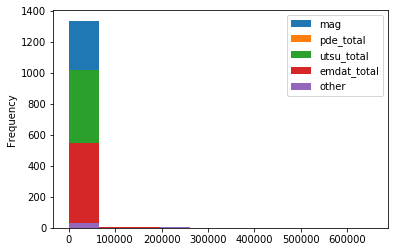

In [119]:
quake_df.plot(kind = 'hist', x='deaths')
plt.show()

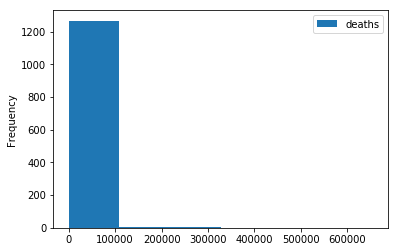

In [120]:
quake_df.deaths.plot(kind = 'hist', legend = True, bins = 6)
plt.show()

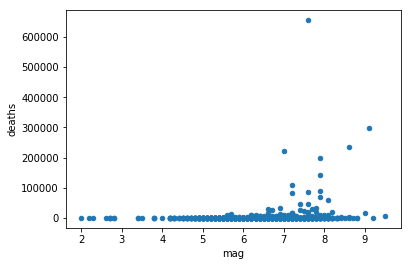

In [121]:
quake_df.plot(kind = 'scatter', y='deaths', x='mag', legend = True)
plt.show()

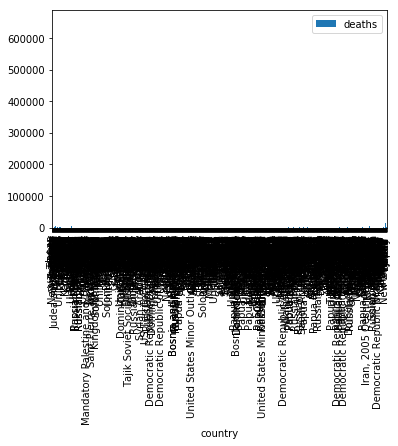

In [122]:
quake_df.plot(kind = 'bar', x='country', y='deaths', legend = True)
plt.show()

In [123]:
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [124]:
quake_df.country.value_counts(dropna = False)

China                                133
Indonesia                             82
Iran                                  78
Japan                                 62
Turkey                                60
Peru                                  48
Greece                                38
Mexico                                37
Turkey                                35
Philippines                           35
China                                 33
Taiwan                                32
Chile                                 31
Italy                                 26
Afghanistan                           25
Colombia                              21
Japan                                 20
Pakistan                              20
Algeria                               19
United States                         18
United States                         16
India                                 16
Taiwan                                16
Papua New Guinea                      15
Ecuador         

## Do we have more complete deathcounts as we move forward in history?

In [125]:
print(quake_df.origin[2])
type(quake_df.origin[2])

1900-07-12 06:25


str

In [126]:
quake_df['origin'] = pd.to_datetime(quake_df['origin'])

In [127]:
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths
1,1900-05-11 17:23:00,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25:00,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11:00,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11:00,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [128]:
for d in quake_df.origin:
    print(d.year)

1900
1900
1900
1901
1901
1901
1901
1902
1902
1902
1902
1902
1902
1902
1902
1903
1903
1903
1903
1903
1904
1904
1904
1904
1905
1905
1905
1905
1905
1906
1906
1906
1906
1906
1906
1907
1907
1907
1907
1907
1908
1908
1909
1909
1909
1909
1909
1909
1909
1909
1909
1909
1909
1910
1910
1910
1910
1911
1911
1911
1911
1911
1912
1912
1912
1912
1912
1913
1913
1913
1913
1913
1914
1914
1914
1914
1914
1914
1914
1915
1915
1915
1915
1915
1916
1916
1917
1917
1917
1917
1917
1917
1918
1918
1918
1918
1918
1919
1920
1920
1920
1920
1920
1920
1921
1921
1922
1922
1922
1922
1922
1922
1923
1923
1923
1923
1923
1923
1923
1923
1923
1924
1924
1924
1924
1924
1924
1925
1925
1925
1925
1925
1926
1926
1926
1926
1926
1927
1927
1927
1927
1927
1927
1928
1928
1928
1928
1928
1928
1928
1928
1928
1929
1929
1929
1929
1929
1929
1929
1929
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1931
1931
1931
1931
1931
1931
1931
1931
1931
1931
1931
1931
1932
1932
1932
1932
1932
1932
1932
1932
1932
1932
1933
1933
1933
1933
1933
1933


In [139]:
quake_df['year'] = pd.DatetimeIndex(quake_df['origin']).year
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths,year
1,1900-05-11 17:23:00,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
2,1900-07-12 06:25:00,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900
3,1900-10-29 09:11:00,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
4,1901-02-15 00:00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901
5,1901-03-31 07:11:00,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901


In [143]:
quake_df.groupby('year').head(20)

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths,year
1,1900-05-11 17:23:00,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
2,1900-07-12 06:25:00,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900
3,1900-10-29 09:11:00,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
4,1901-02-15 00:00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901
5,1901-03-31 07:11:00,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901
6,1901-08-09 09:23:00,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN,1901
7,1901-11-15 20:15:00,New Zealand,-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1901
8,1902-01-30 14:01:00,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1902
9,1902-02-13 09:39:00,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0,1902
10,1902-03-09 07:46:00,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1902


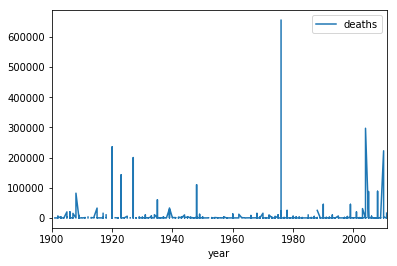

In [151]:
quake_df.plot(kind = 'line', x = 'year', y = 'deaths')
plt.show()

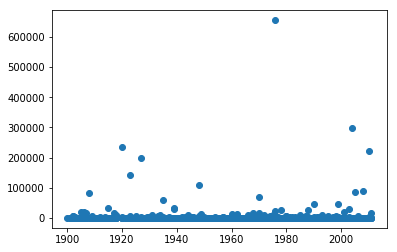

In [156]:
plt.scatter(quake_df.year, quake_df.deaths)
plt.show()

In [165]:
deathtoll = quake_df['year']
print(type(deathtoll))
deathtoll.head()

<class 'pandas.core.series.Series'>


1    1900
2    1900
3    1900
4    1901
5    1901
Name: year, dtype: object

In [166]:
deathtoll_df = pd.DataFrame(deathtoll)
deathtoll_df['deaths'] = quake_df['deaths']
deathtoll_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342 entries, 1 to deaths
Data columns (total 2 columns):
year      1342 non-null object
deaths    1274 non-null float64
dtypes: float64(1), object(1)
memory usage: 71.5+ KB


In [167]:
deathtoll_df.head()

,year,deaths
1,1900,NaN
2,1900,140.0
3,1900,NaN
4,1901,NaN
5,1901,4.0


In [170]:
deathtoll_df['estimated'] = deathtoll_df.deaths.apply(pd.isnull)
deathtoll_df.head()

,year,deaths,estimated
1,1900,NaN,True
2,1900,140.0,False
3,1900,NaN,True
4,1901,NaN,True
5,1901,4.0,False


In [171]:
plt.bar(x='year', y='estimated', data = deathtoll_df)
plt.show()

TypeError: bar() missing 2 required positional arguments: 'left' and 'height'

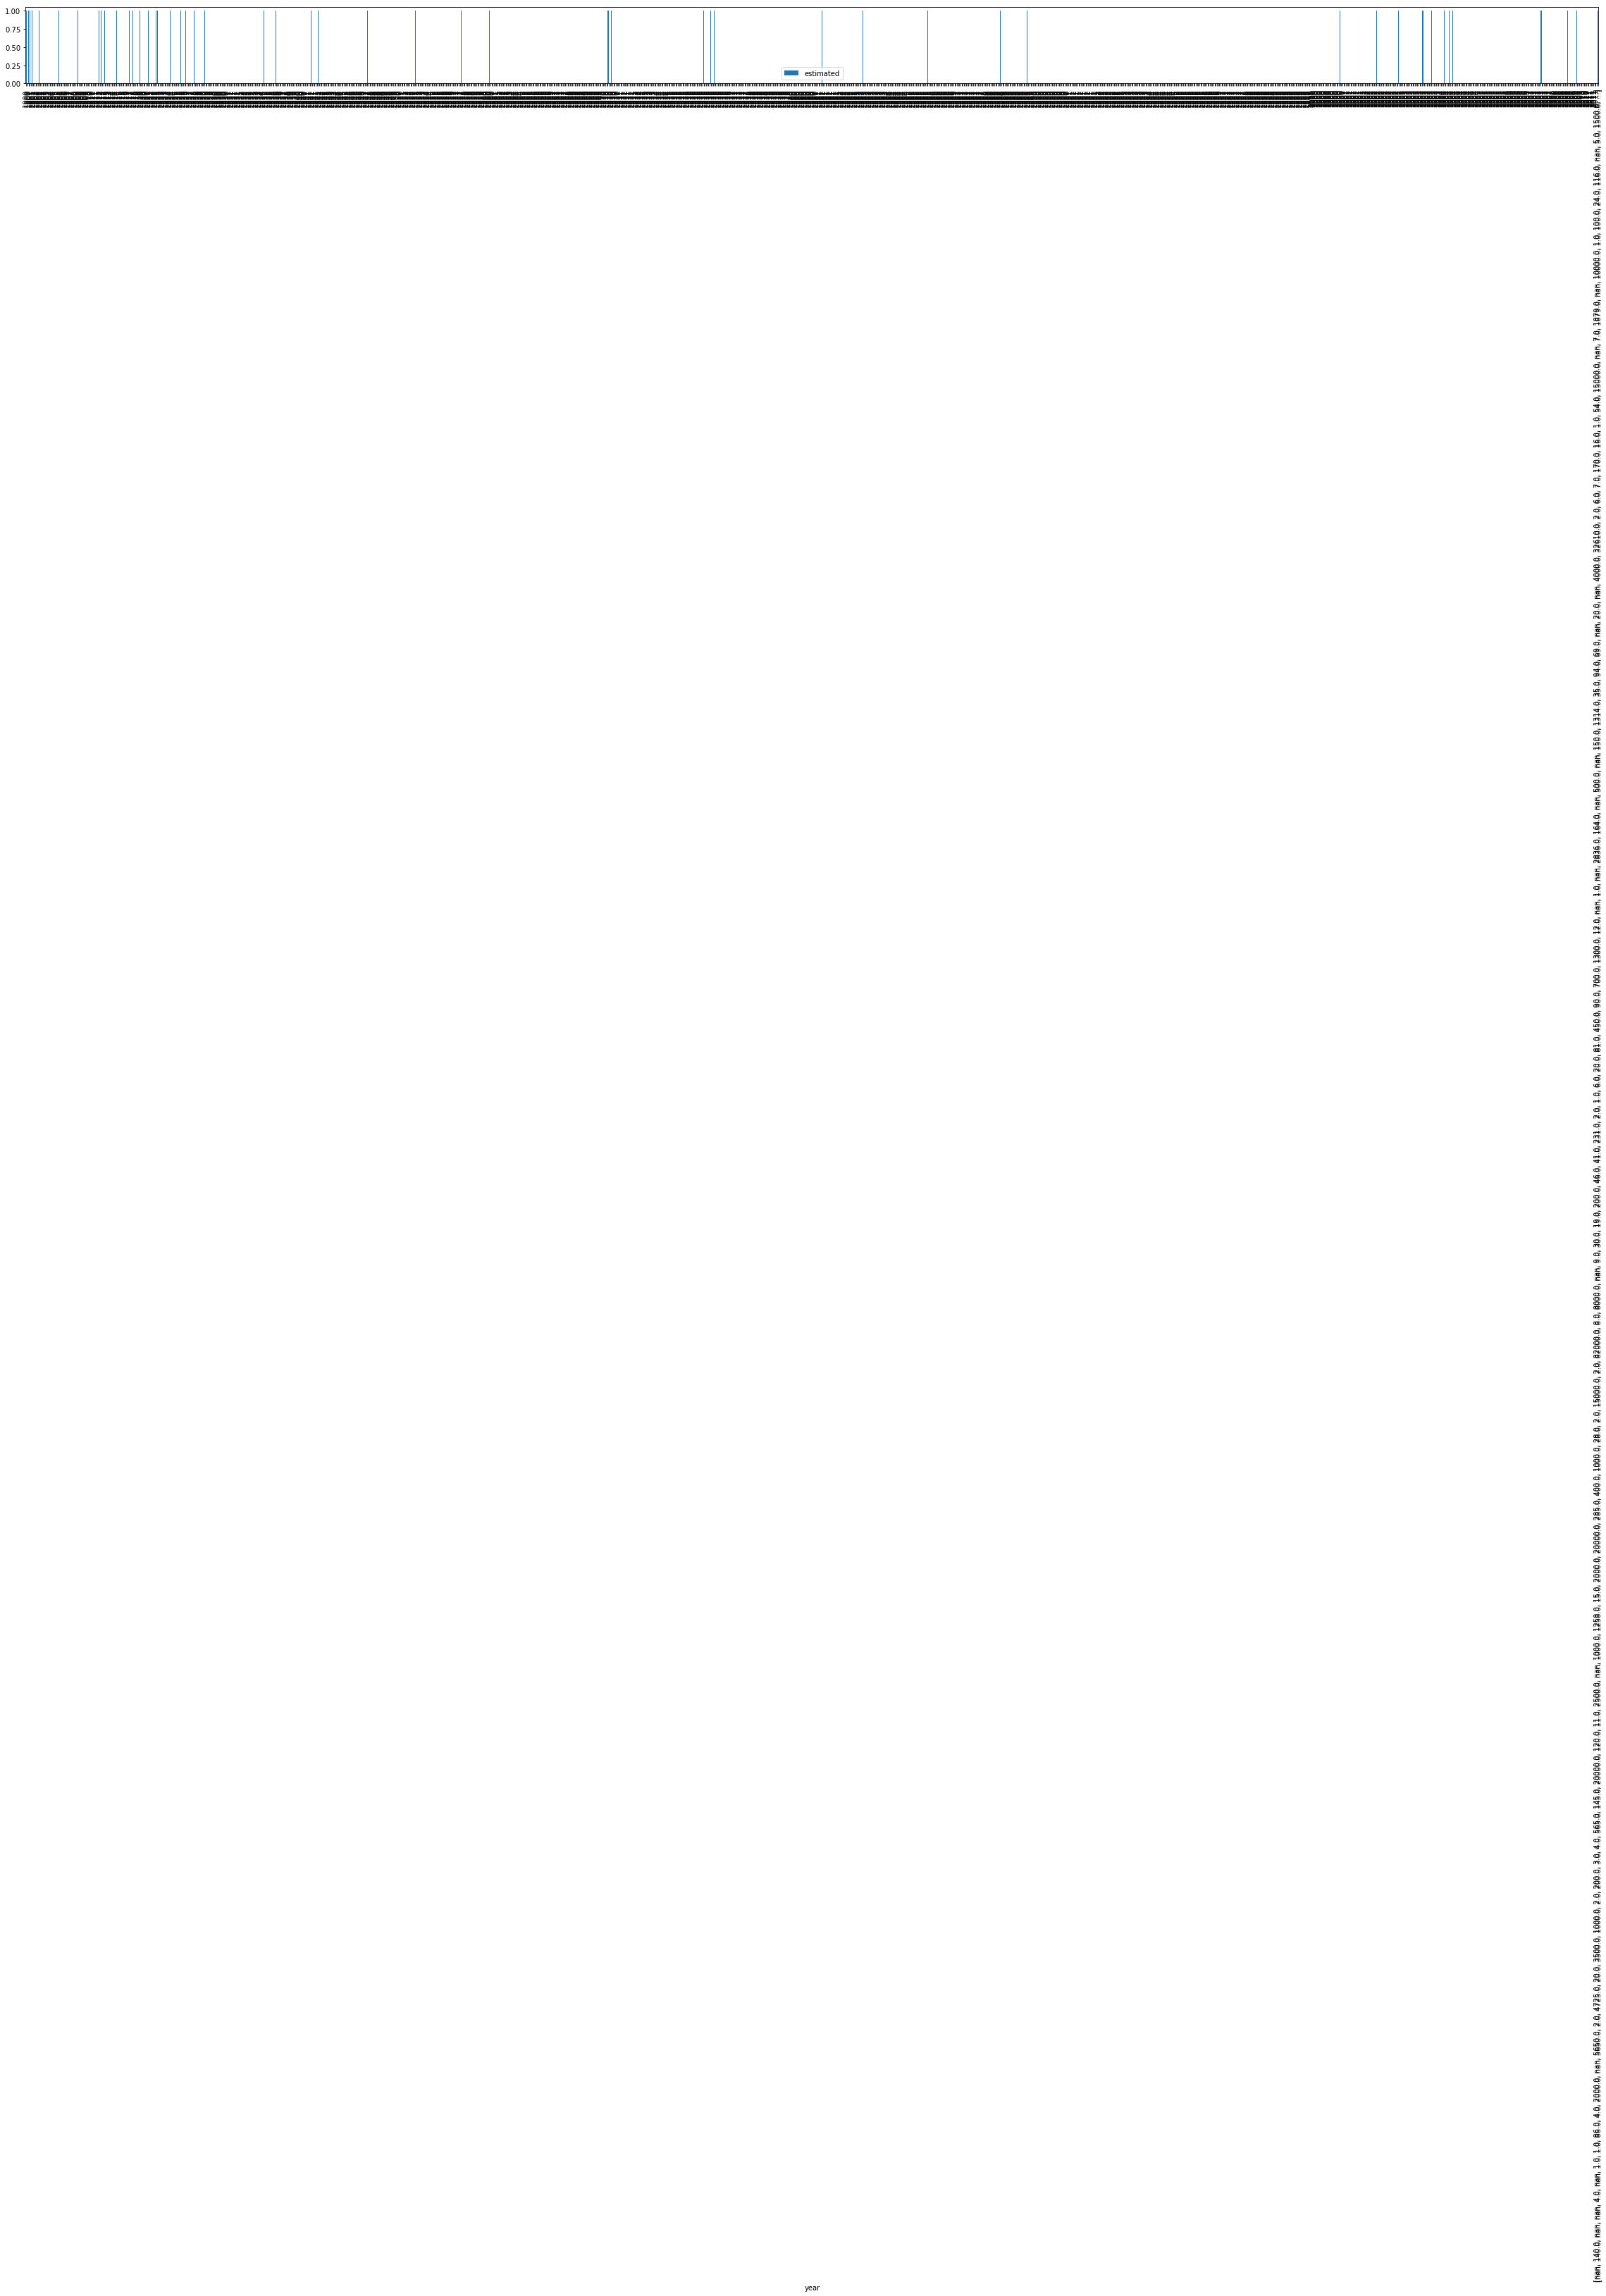

In [188]:
deathtoll_df.plot(kind = 'bar', x='year', y='estimated', figsize=(40,2), rot = 90)
plt.show()